Se manejan 5 categorías:
+ 1 - Nota entre 6.0 y 7.0
+ 2 - Nota entre 5.0 y 5.9
+ 3 - Nota entre 4.0 y 4.9
+ 4 - Nota entre 3.0 y 3.9
+ 5 - Nota inferior o igual a 2.9

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

## Definición de parámetros

Estos valores debe estar en el archivo model.config

In [ ]:
MAX_ESCALA = 5
N_ITEMS = 8
N_OBSERVACIONES = 150
N_CLUSTERS = 5
PUNTAJE = 7
PUNTAJE_MAXIMO = MAX_ESCALA*N_ITEMS
EXIGENCIA = 0.6
NOTA_MAXIMA = 7
NOTA_MINIMA = 1
NOTA_APROBACION = 4
PUNTAJE_CORTE = PUNTAJE_MAXIMO*EXIGENCIA

## Simulación manual

In [ ]:
#escala = [PUNTAJE, round(PUNTAJE*0.8,1), round(PUNTAJE*0.6,1), round(PUNTAJE*0.3,1), 0]
escala = [5,4,3,2,1]
archivo = open("Simulation.csv","w")
header = "RUT"
for item in range(1, N_ITEMS+1):
    header = header + ";I" + str(item);
archivo.write(header + ";NOTA;CATEGORIA" + "\n")

for index in range(1, N_OBSERVACIONES+1):
    puntaje = 0
    line = str(index)
    for item in range(1, N_ITEMS+1):
        logro = np.random.randint(5)
        line = line + ";" + str(escala[logro])
        puntaje += logro
        #print("Item", item, "logro =", escala[logro])
    # Calcula la nota
    nota = 0
    if puntaje >= PUNTAJE_CORTE:
        nota = round((NOTA_MAXIMA - NOTA_APROBACION)*(puntaje-PUNTAJE_CORTE)/(PUNTAJE_MAXIMO*(1-EXIGENCIA))+NOTA_APROBACION,1)
    else: 
        nota = round((NOTA_APROBACION - NOTA_MINIMA)*(puntaje/PUNTAJE_CORTE)+NOTA_MINIMA,1)
    categoria = 5
    # Determina la categoria de acuerdo a la nota
    if nota >= 6.0: categoria = 1
    elif nota >= 5: categoria = 2
    elif nota >= 4: categoria = 3
    elif nota >= 3: categoria = 4
    line = line + ";" + str(nota) + ";" + str(categoria)
    archivo.write(line + "\n")
archivo.close()

## Simulación usando make_blobs

In [ ]:
X, y = make_blobs(
        n_samples    = N_OBSERVACIONES , 
        n_features   = N_ITEMS, 
        centers = N_CLUSTERS,
        cluster_std = 0.6,
        shuffle      = True, 
        random_state = 0
       )



In [ ]:
X

array([[  1.2021254 ,   3.64414685,   2.23421043, ...,   2.82810154,
         -1.50934791,   8.94501825],
       [  1.01618041,   4.48527047,   1.67467427, ...,   2.70215036,
         -1.73614354,   6.79969045],
       [ -0.437998  ,   1.32938595,  -9.41530245, ...,   2.32011818,
          9.82228069,   3.15910565],
       ...,
       [  1.32222457,   4.17880807,   2.29287155, ...,   3.18151728,
         -1.14825168,   8.21647888],
       [ -7.9052933 ,   2.95783321,  -6.69907396, ...,  -2.36850493,
         -4.76990612,   5.49624142],
       [-10.07900796,   5.98140976,   5.48450261, ...,   5.58723625,
         -1.45429423,   6.08155804]])

In [ ]:
y

array([0, 0, 4, 3, 4, 1, 3, 2, 4, 3, 2, 2, 0, 1, 2, 4, 3, 0, 1, 4, 2, 0,
       3, 0, 3, 4, 3, 3, 2, 3, 1, 0, 0, 4, 2, 2, 3, 4, 4, 0, 3, 0, 1, 2,
       1, 4, 1, 2, 2, 4, 0, 4, 0, 1, 4, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1,
       0, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 4, 1, 0, 2, 1, 1, 2, 0, 1,
       2, 4, 4, 4, 3, 4, 3, 2, 3, 2, 3, 1, 4, 1, 4, 1, 0, 4, 4, 3, 1, 1,
       4, 1, 0, 4, 3, 3, 3, 0, 0, 2, 4, 0, 3, 3, 2, 0, 1, 1, 3, 0, 2, 2,
       1, 4, 0, 3, 0, 1, 0, 0, 4, 3, 4, 3, 4, 2, 4, 0, 3, 2])

### Funciones útiles

In [ ]:
def calculate_note(puntaje):
    if puntaje >= PUNTAJE_CORTE:
        nota = round((NOTA_MAXIMA - NOTA_APROBACION)*(puntaje-PUNTAJE_CORTE)/(PUNTAJE_MAXIMO*(1-EXIGENCIA))+NOTA_APROBACION,1)
    else: 
        nota = round((NOTA_APROBACION - NOTA_MINIMA)*(puntaje/PUNTAJE_CORTE)+NOTA_MINIMA,1)
    return nota

def calculate_categorie(nota):
    if nota >= 6.0: categoria = 1
    elif nota >= 5: categoria = 2
    elif nota >= 4: categoria = 3
    elif nota >= 3: categoria = 4
    else: categoria = 5
    return categoria

### Calcula puntaje, nota y categoría

In [ ]:
all_features = ['ID','I1','I2','I3','I4','I5','I6','I7','I8','PUNTAJE','NOTA','CATEGORIA']
items_features = ['I1','I2','I3','I4','I5','I6','I7','I8']
data_frame = pd.DataFrame(X, columns=items_features)
data_frame = data_frame.apply(lambda value : round(abs(value)), axis = 1)
for column in data_frame.columns:
    data_frame[column] = data_frame[column].apply(lambda value : np.max([value, 1.0]))
    data_frame[column] = data_frame[column].apply(lambda value : np.min([value, MAX_ESCALA]))
data_frame['PUNTAJE'] = data_frame.sum(axis=1)
data_frame['NOTA'] = data_frame['PUNTAJE'].apply(lambda row : calculate_note(row))
data_frame['CATEGORIA'] = data_frame['NOTA'].apply(lambda row : calculate_categorie(row))
data_frame['ID'] = range(1, X.shape[0]+1)
data_frame = data_frame.reindex(columns=all_features)
data_frame

,ID,I1,I2,I3,I4,I5,I6,I7,I8,PUNTAJE,NOTA,CATEGORIA
0,1,1.0,4.0,2.0,2.0,2.0,3.0,2.0,5.0,21.0,3.6,4
1,2,1.0,4.0,2.0,1.0,2.0,3.0,2.0,5.0,20.0,3.5,4
2,3,1.0,1.0,5.0,3.0,2.0,2.0,5.0,3.0,22.0,3.8,4
3,4,5.0,3.0,5.0,5.0,1.0,2.0,5.0,5.0,31.0,5.3,2
4,5,1.0,1.0,5.0,2.0,3.0,3.0,5.0,3.0,23.0,3.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,36.0,6.2,1
146,147,1.0,2.0,5.0,3.0,3.0,3.0,5.0,4.0,26.0,4.4,3
147,148,1.0,4.0,2.0,1.0,2.0,3.0,1.0,5.0,19.0,3.4,4
148,149,5.0,3.0,5.0,5.0,1.0,2.0,5.0,5.0,31.0,5.3,2


In [ ]:
# Revisión de distribución de cada categoría
data_frame.groupby('CATEGORIA').size()

CATEGORIA
1    30
2    47
3    27
4    46
dtype: int64

In [ ]:
data_frame.describe()

,ID,I1,I2,I3,I4,I5,I6,I7,I8,PUNTAJE,NOTA,CATEGORIA
count,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,3.433333,3.22000,4.393333,2.940000,2.313333,3.433333,3.413333,4.666667,27.813333,4.771333,2.593333
std,43.445368,1.933167,1.37509,1.231012,1.788216,1.479782,1.377756,1.806724,0.662177,5.936336,1.003038,1.123852
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,17.000000,3.100000,1.000000
25%,38.250000,1.000000,2.00000,5.000000,1.000000,1.000000,2.000000,1.000000,5.000000,22.250000,3.825000,2.000000
50%,75.500000,5.000000,3.00000,5.000000,2.500000,2.000000,3.000000,5.000000,5.000000,30.000000,5.100000,2.000000
75%,112.750000,5.000000,5.00000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,31.000000,5.300000,4.000000
max,150.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,37.000000,6.400000,4.000000


In [ ]:
data_frame.to_csv("Simulation_data.csv", index = False)

In [ ]:
df_students = pd.read_csv("Simulation_data.csv")
df_students.head()

,ID,I1,I2,I3,I4,I5,I6,I7,I8,PUNTAJE,NOTA,CATEGORIA
0,1,1.0,4.0,2.0,2.0,2.0,3.0,2.0,5.0,21.0,3.6,4
1,2,1.0,4.0,2.0,1.0,2.0,3.0,2.0,5.0,20.0,3.5,4
2,3,1.0,1.0,5.0,3.0,2.0,2.0,5.0,3.0,22.0,3.8,4
3,4,5.0,3.0,5.0,5.0,1.0,2.0,5.0,5.0,31.0,5.3,2
4,5,1.0,1.0,5.0,2.0,3.0,3.0,5.0,3.0,23.0,3.9,4


In [ ]:
df_students.iloc[:, 1]

0      1.0
1      1.0
2      1.0
3      5.0
4      1.0
      ... 
145    5.0
146    1.0
147    1.0
148    5.0
149    5.0
Name: I1, Length: 150, dtype: float64

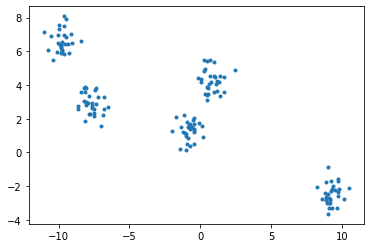

In [ ]:
#plt.scatter(df_students.iloc[:, 1], df_students.iloc[:, 2], marker='.');
plt.scatter(X[:, 0], X[:, 1], marker='.');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ddaaf58-075e-4191-8bbb-dc9543aea97c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>